# Agglomerative Clustering

This Code template is for the Cluster analysis using a simple Agglomerative Clustering algorithm. Which is type of hierarchical clustering, and this code template includes 2D and 3D cluster visualization of the Clusters.

### Required Packages

In [ ]:
!pip install plotly

In [24]:
import operator
import warnings
import itertools
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
warnings.filterwarnings("ignore")

### Initialization

Filepath of CSV file

In [25]:
file_path = ""

List of features which are required for model training

In [26]:
features=[]

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [27]:
df=pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [28]:
X = df[features]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [29]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [30]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
X.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


### Dendrogram

The dendrogram represents how each cluster gets formed by drawing a  link between a non-singleton Cluster and its children. The length of the two legs of the links represents the distance between the child clusters. The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. This helps in identifying the number of clusters to be selected.


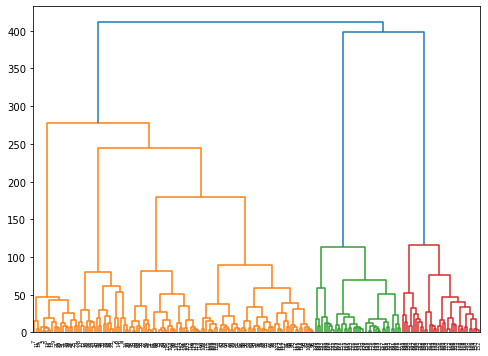

In [42]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

### Model

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy

> **n_clusters**:The number of clusters to find.

> **affinity**: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. 

> **connectivity**: Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data. This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix, such as derived from kneighbors_graph.

> **compute_full_tree**: Stop early the construction of the tree at n_clusters. 

> **linkage**: Which linkage criterion to use. 

> **distance_threshold**: The linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.

> **compute_distances**: Computes distances between clusters even if distance_threshold is not used. This can be used to make dendrogram visualization, but introduces a computational and memory overhead.

[For more parameter details](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [32]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

AgglomerativeClustering(n_clusters=5)

### Cluster Analysis

First, we add the cluster labels from the trained model into the copy of the data frame for cluster analysis/visualization.

In [35]:
ClusterDF = X.copy()
ClusterDF['ClusterID'] = model.fit_predict(X)
ClusterDF.head()

,Annual Income (k$),Spending Score (1-100),Age,ClusterID
0,15,39,19,4
1,15,81,21,3
2,16,6,20,4
3,16,77,23,3
4,17,40,31,4


#### Cluster Records
The below bar graphs show the number of data points in each available cluster.

<AxesSubplot:>

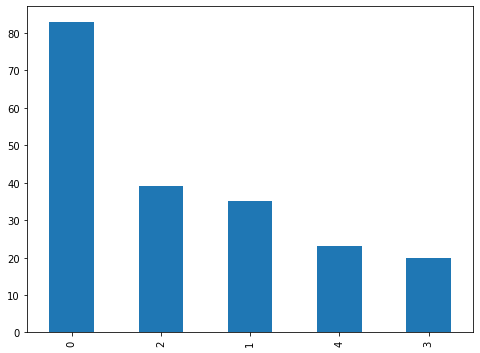

In [36]:
ClusterDF['ClusterID'].value_counts().plot(kind='bar')

#### Cluster Plots
Below written functions get utilized to plot 2-Dimensional and 3-Dimensional cluster plots on the available set of features in the dataset. Plots include different available clusters along with cluster centroid.

In [37]:
def Plot2DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 2)):
        plt.rcParams["figure.figsize"] = (8,6)
        xi,yi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1])
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            plt.scatter(DFC[i[0]],DFC[i[1]],cmap=plt.cm.Accent,label=j)
        plt.xlabel(i[0])
        plt.ylabel(i[1])
        plt.legend()
        plt.show()

def Plot3DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig,ax = plt.figure(figsize = (16, 10)),plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.3,alpha = 0.2)
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            ax.scatter3D(DFC[i[0]],DFC[i[1]],DFC[i[2]],alpha = 0.8,cmap=plt.cm.Accent,label=j)
        ax.set_xlabel(i[0])
        ax.set_ylabel(i[1])
        ax.set_zlabel(i[2])
        plt.legend()
        plt.show()
    
def Plotly3D(X_Cols,df):
    for i in list(itertools.combinations(X_Cols,3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig2=px.scatter_3d(df, x=i[0], y=i[1],z=i[2],color=df['ClusterID'])
        fig2.show()

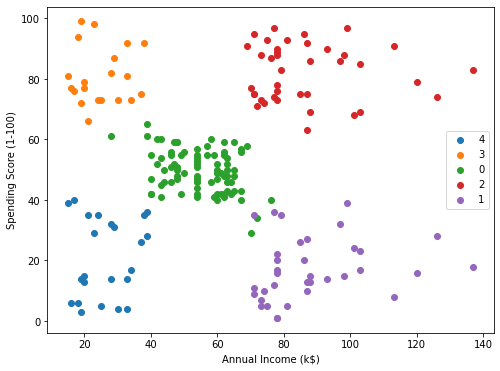

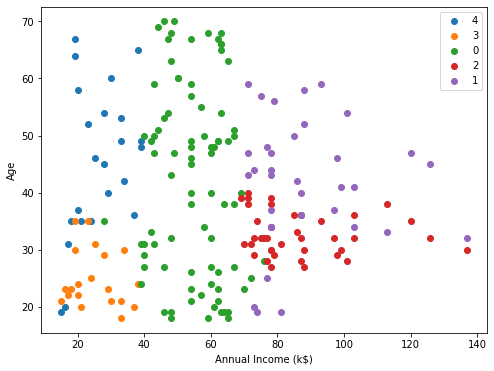

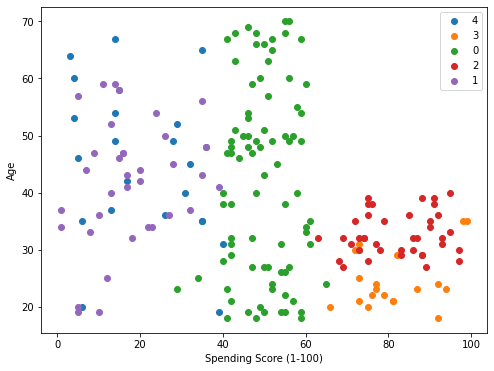

In [38]:
Plot2DCluster(X.columns,ClusterDF)

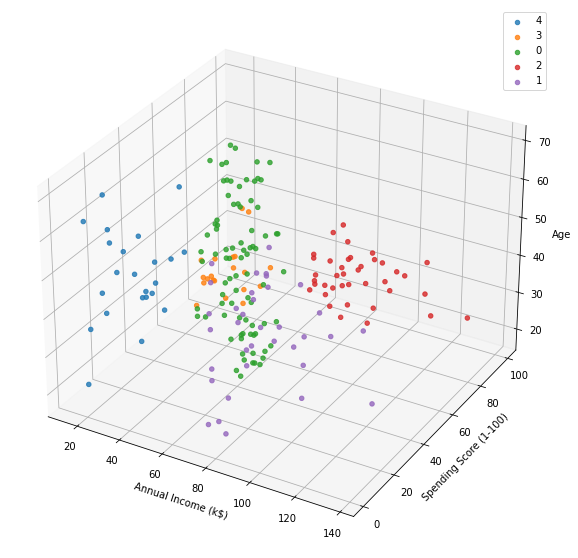

In [39]:
Plot3DCluster(X.columns,ClusterDF)

In [40]:
Plotly3D(X.columns,ClusterDF)

 #### [Creator by Thilakraj Devadiga](https://github.com/Thilakraj1998)